In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

In [4]:
df = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [5]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# let's rename the columns so that they make sense
df.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# for sake of consistency, let's also make all column labels of type string
df.columns = list(map(str, df.columns))

# set the country name as index - useful for quickly looking up countries using .loc method
df.set_index('Country', inplace=True)

# add total column
df['Total'] = df.sum(axis=1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print('data dimensions:', df.shape)

data dimensions: (195, 38)


In [6]:
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [13]:
df_top5 = df.sort_values(['Total'] , ascending=False).head()

In [14]:
df_top5 = df_top5[years].transpose()

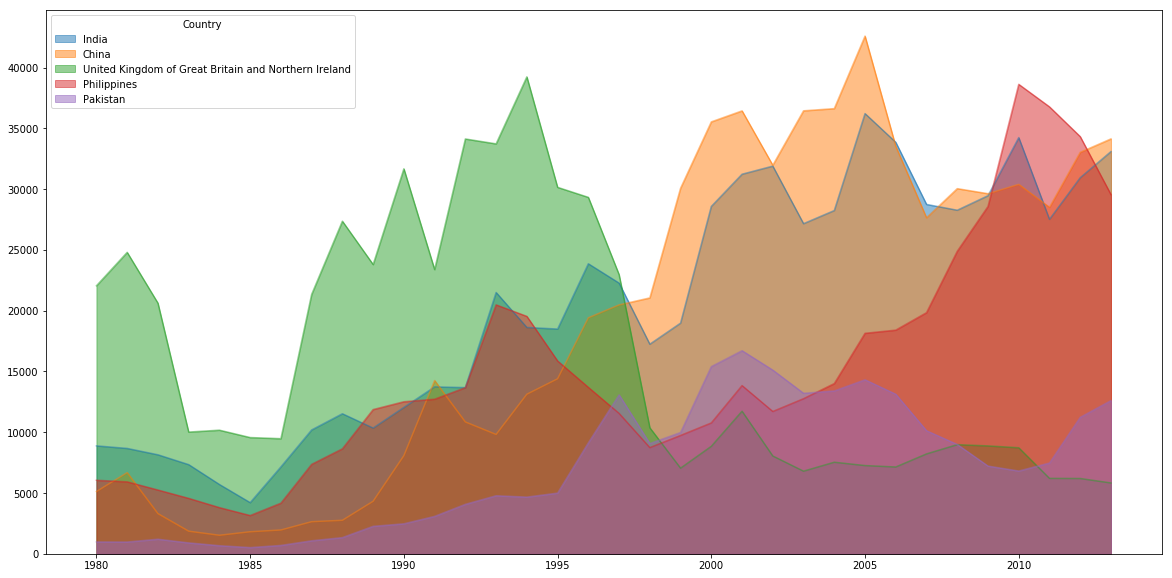

In [21]:
df_top5.plot(kind="area", figsize=(20, 10), stacked=False)

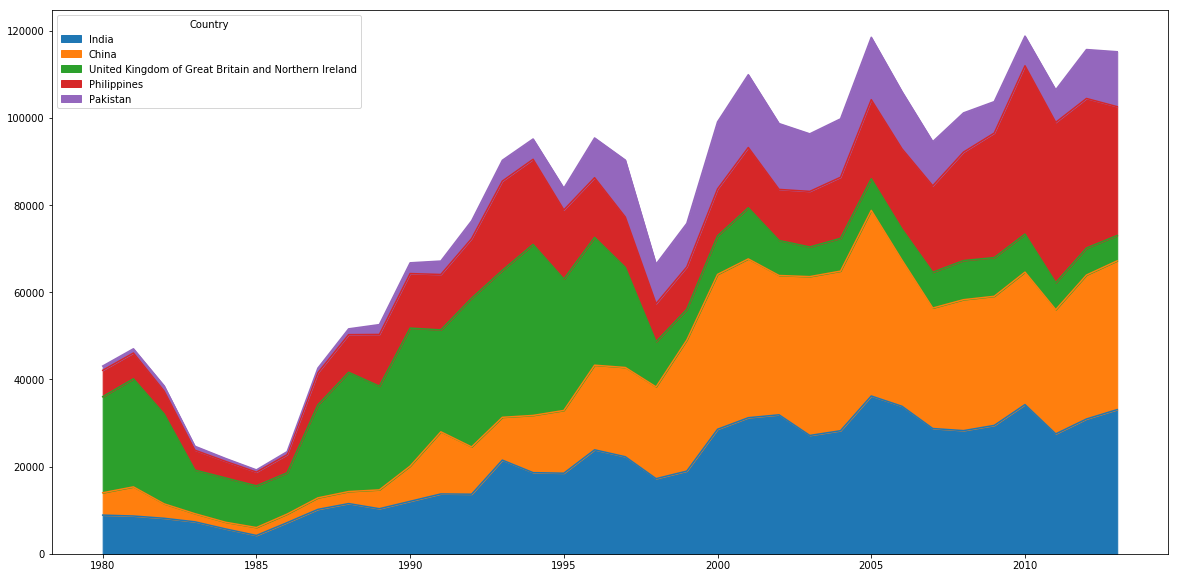

In [20]:
df_top5.plot(kind="area", figsize=(20, 10))

In [23]:
count, bin_edges = np.histogram(df['2013'])

In [24]:
count

array([178,  11,   1,   2,   0,   0,   0,   0,   1,   2], dtype=int64)

In [25]:
bin_edges

array([    0. ,  3412.9,  6825.8, 10238.7, 13651.6, 17064.5, 20477.4,
       23890.3, 27303.2, 30716.1, 34129. ])

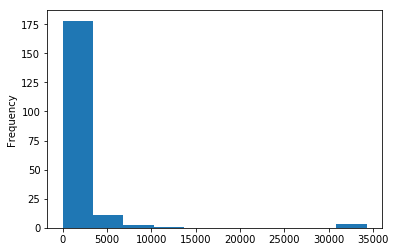

In [26]:
df['2012'].plot(kind="hist")

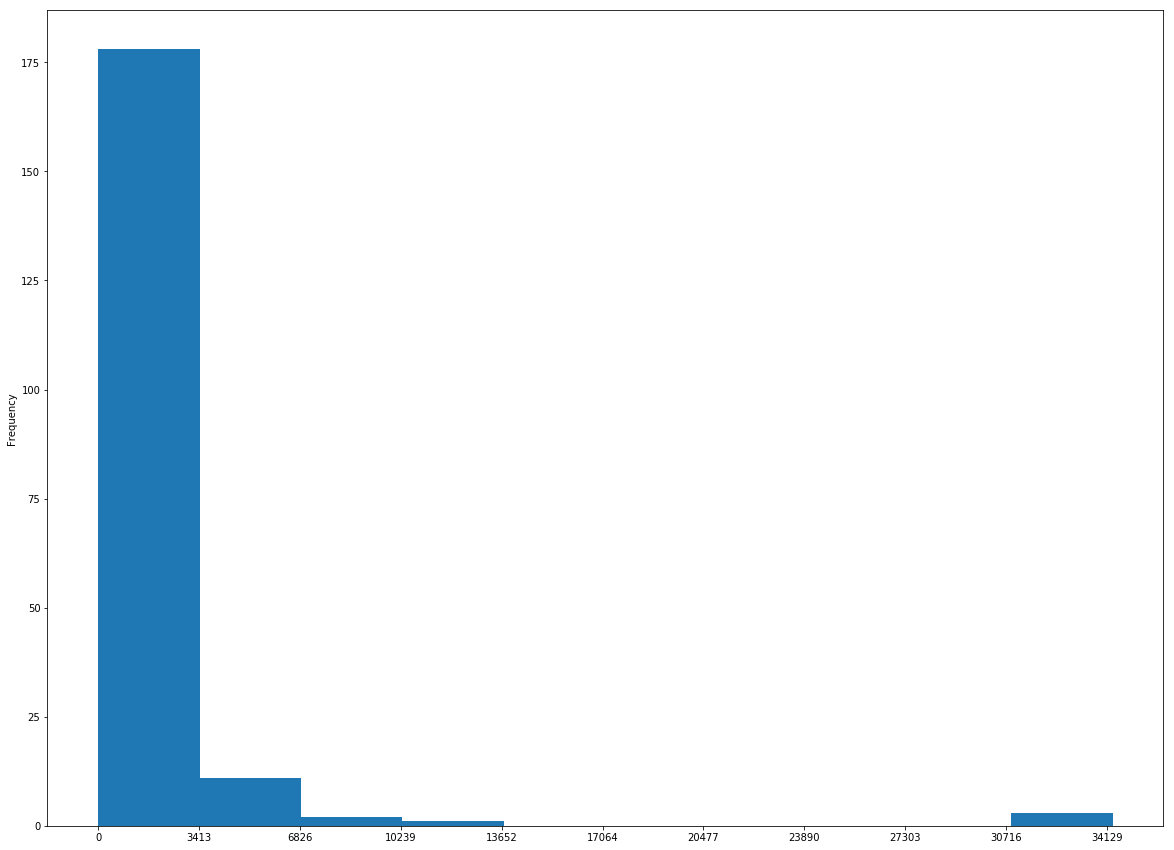

In [28]:
df['2012'].plot(kind="hist", xticks=bin_edges , figsize=(20, 15))